# Investment Analysis for Spark funds

Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

##### Importing all the necessary libraries for the analysis

In [1]:
import pandas as pd, numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.patches as mpatches

##### Reading the datasets from csv files

In [2]:
companies = pd.read_csv('companies.csv', encoding = "palmos")
rounds2 = pd.read_csv("rounds2.csv", encoding = "palmos")

##### Viewing the records of companies.csv

In [3]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


##### Viewing the records of rounds2.csv

In [4]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


#### Examing the info, shape and other dimensions of both the datasets

In [5]:
#info of companies file
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [6]:
#Shape of companies file
companies.shape

(66368, 10)

In [7]:
#Data types of columns in companies file
companies.dtypes

permalink        object
name             object
homepage_url     object
category_list    object
status           object
country_code     object
state_code       object
region           object
city             object
founded_at       object
dtype: object

In [8]:
#info of rounds2 file
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [9]:
#Shape of rounds2 file
rounds2.shape

(114949, 6)

In [10]:
#Data types of columns in rounds2 file
rounds2.dtypes

company_permalink           object
funding_round_permalink     object
funding_round_type          object
funding_round_code          object
funded_at                   object
raised_amount_usd          float64
dtype: object

## <u>Data Cleaning</u>

Actions performed to clean the data are:
- Checked for duplicate data in both data sets by mainting the same format for unique columns in both datasets
- Merged the dataframes into one master dataframe
- Dropped records with missing values in various columns 

##### Checking for total data in both Datasets

In [11]:
#checking how many records of data are present in companies.csv via 'permalink' column
len(companies.pivot_table(index=['permalink'], aggfunc='size'))

66368

In [12]:
#checking how many records of data are present in rounds2.csv via the 'company_permalink' column
len(rounds2.pivot_table(index=['company_permalink'], aggfunc='size'))

90247

### Note:

We see that `companies.csv` file has no duplicate data as it is matching to the number of records originally present, but the `rounds2.csv` file does have duplicate data as the original file has `114949 records`.

We also observe that the `company_permalink` in the `rounds2.csv` column has a few entries which are in upper case where as all the entries in `permalink` column of the `companies.csv` are in lower case, as the `companies.csv` file has no duplicate data we will be taking it as reference and convert all the records of the `company_permalink` column and the `permalink` column to lowercase 

In [13]:
#Convert all records of the 'company' column of companies.csv to lowercase 
companies['permalink'] = companies['permalink'].apply(lambda x:x.lower())

#Convert all records of the 'company_permalink' column of rounds2.csv to lowercase 
rounds2['company_permalink'] = rounds2['company_permalink'].apply(lambda x:x.lower())

##### Checking for unique values in both datasets

In [14]:
#Checking for Unique values in "companies.csv"
len(companies.permalink.unique())

66368

In [15]:
#Checking for Unique values in "rounds2.csv"
len(rounds2.company_permalink.unique())

66368

We now see that both the columns of both datasets i.e `permalink` and `company_permalink` are having `66368` unique records.

In [16]:
#Checking if there are any companies in the rounds2 file which are not present in companies file
rounds2.loc[~rounds2['company_permalink'].isin(companies['permalink']), :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


We see that the records present for the `permalink` column in the `companies.csv` file are same as records in the `rounds2.csv` file of the `company_permalink` column

As the `permalink` column in the `companies.csv` file are same as records in the `rounds2.csv` file of the `company_permalink` column lets rename the `company_permalink` column to `permalink_1`

In [17]:
#Renaming "company_permalink" column to "permalink_1"
rounds2 = rounds2.rename(columns={'company_permalink':'permalink1'})

In [18]:
rounds2.head(2)

,permalink1,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN


In [19]:
companies.head(2)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014


##### Checking for missing values in both the datasets

In [20]:
#Checking missing values in companies.csv
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [21]:
#Checking missing values in rounds2.csv
rounds2.isnull().sum()

permalink1                     0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [22]:
rounds2.shape

(114949, 6)

We see that both the data sets have huge number of missing values and as we need to merge the dataframes, we can deal the missing values altogether after merging the dataframes into one `master_frame` dataframe and we can do that on columns which have no missing values which is the `permalink` and `permalink1` columns

##### Merging both the dataframes in to one `master_frame` dataframe

In [23]:
#Merging companies and rounds2 together
master_frame = pd.merge(companies, rounds2, how="inner", left_on="permalink", right_on="permalink1")
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,permalink1,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


Now as the dataframes have been merged we have one extra column that is the `permalink1` which we can go ahead and drop.

In [24]:
#Dropping "permalink1" column as it is the same as "permalink"
master_frame =  master_frame.drop(['permalink1'], axis=1) 
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


##### Checking for missing values in master_frame 

In [25]:
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

### Note:

As the objective is to identify the best sectors, countries, and a suitable investment type for making investments and the types of analysis we need to perform are :

- `Investment analysis`
- `Country analysis`
- `Sector analysis`

Spark Funds has two minor constraints for investments:

- `It wants to invest between 5 to 15 million USD per round of investment`
- `It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in.`

*Hence we can go ahead and drop the following columns which are not useful for further analysis so we can focus on variables which are important:*

- `homepage_url`
- `state_code`
- `region`
- `city`
- `founded_at`

Please note that we are not dropping the `country_code` as we need it for `Country analysis`

In [26]:
#Dropping unwanted columns 
master_frame = master_frame.drop(['homepage_url', 'state_code', 'region', 'city', 'founded_at'], axis=1)
master_frame.head(3)

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0


In [27]:
#Checking number of observations in master_frame
master_frame.shape

(114949, 10)

We see that there are `114949 rows` and `10 columns` in the `master_frame` dataset

In [28]:
#Rechecking all the missing values in master_frame 
master_frame.isnull().sum()

permalink                      0
name                           1
category_list               3410
status                         0
country_code                8678
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

We see that the only variables that have missing values now are `name`, `category_list`, `country_code`, `funding_round_code` and `raised_amount_usd` so lets deal with the missing values order wise, As the target variable here would be `raised_amount_usd` lets deal with it in the end.

In [29]:
#Viewing the record which is a null value in "name" column
master_frame[master_frame.name.isnull()]

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
98692,/organization/tell-it-in,NaN,Startups,closed,USA,/funding-round/9c987e616755a78c51a4aa67c27a2a93,seed,NaN,01-03-2012,25000.0


As we cannot assume a name or impute one for this record we can go ahead and drop this record

In [30]:
#Dropping the row having null values in the name column
master_frame = master_frame[~master_frame.name.isnull()]

In [31]:
#Viewing the records which are null values in "category_list" column
master_frame[master_frame.category_list.isnull()]

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
99,/organization/123feng-com,123Feng.Com,NaN,operating,CHN,/funding-round/9d83084d87dc63a309c9a6fe9bf59d1b,venture,A,27-10-2015,13000000.0
123,/organization/15fen,15Fen,NaN,operating,CHN,/funding-round/b660e2c345e5cda7db2f1e0176a450b3,seed,NaN,15-12-2013,NaN
133,/organization/17-media,17 Media,NaN,operating,NaN,/funding-round/f8ffde9fa822843ac6ea9b66cc615df1,venture,A,05-11-2015,10000000.0
181,/organization/1mxians,1mxians,NaN,operating,CHN,/funding-round/6950448f81c6706abe61f659e15a7c87,venture,A,02-12-2015,15000000.0
185,/organization/1rp-media,1RP Media,NaN,operating,USA,/funding-round/f7400a94939ef73f70af0c52b54b31ce,seed,NaN,29-06-2012,NaN
...,...,...,...,...,...,...,...,...,...,...
114450,/organization/zkey-com,Zkey.com,NaN,closed,NaN,/funding-round/aca95e6dda1b354ebee80bca5f261607,venture,B,22-11-1999,10000000.0
114453,/organization/zlango,Zlango,NaN,closed,NaN,/funding-round/203baf1c533923de0bc50699a12f447e,venture,A,12-02-2007,12000000.0
114458,/organization/zlote-mysli,Zlote Mysli,NaN,operating,NaN,/funding-round/0787484a3d22104c752fe8a96d57abe4,venture,A,01-01-2009,NaN
114806,/organization/zuoyebang,Zuoyebang,NaN,operating,NaN,/funding-round/720cfd18d9f4804df5cf722ca8116ec8,venture,A,03-09-2015,NaN


As we cannot assume the categories or impute `3410` categories for this column we can go ahead and drop these as well

In [32]:
#Dropping the rows having null values in the category_list column
master_frame = master_frame[~master_frame.category_list.isnull()]

In [33]:
#Viewing the records which are null values in "country_code" column
master_frame[master_frame.country_code.isnull()]

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
32,/organization/1000chi,Beijing 1000CHI Software Technology,Mobile,operating,NaN,/funding-round/854fae13c5b26b2ea6b32b06c2e5890c,angel,NaN,01-04-2010,43923865.0
66,/organization/10k-2,Beans Around,Coffee|Delivery|Subscription Service,operating,NaN,/funding-round/95401c8e8336892bf375ad94efd6c725,seed,NaN,04-09-2015,100000.0
71,/organization/10tracks-2,10tracks,iOS|Mobile|Music,operating,NaN,/funding-round/74606b480fe509973a3d72c9017876ca,venture,NaN,03-02-2014,NaN
72,/organization/10tracks-2,10tracks,iOS|Mobile|Music,operating,NaN,/funding-round/e31e2474786f930fd72e292ec34e9126,seed,NaN,31-07-2013,NaN
...,...,...,...,...,...,...,...,...,...,...
114835,/organization/zuumtel,ZUUMTEL,Automotive|Design|Real Time,closed,NaN,/funding-round/785ed8667f9d950257f94089050d6eb0,angel,NaN,16-09-2014,200000.0
114836,/organization/zuumtel,ZUUMTEL,Automotive|Design|Real Time,closed,NaN,/funding-round/d5d97d7c8a5e923715b15495d44e7cb8,seed,NaN,01-04-2013,100000.0
114849,"/organization/zwayo-""on-demand-valet-parking""","Zwayo ""On-Demand Valet Parking""",Apps|Cars|Parking,operating,NaN,/funding-round/eb5163bb6feea4384121e27699bb7b25,seed,NaN,01-09-2014,60000.0
114860,/organization/zyfin,Zyfin,Finance,operating,NaN,/funding-round/98cef3afd5e88487a9829ff182fb1a25,venture,A,01-11-2011,NaN


As we cannot assume the country codes or impute `8678` country codes for these records we can go ahead and drop these as well

In [34]:
#Dropping the rows having null values in the country_code column
master_frame = master_frame[~master_frame.country_code.isnull()]

In [35]:
#Viewing the records which are null values in "funding_round_code" column
master_frame[master_frame.funding_round_code.isnull()]

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
5,/organization/004-technologies,004 Technologies,Software,operating,USA,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
6,/organization/01games-technology,01Games Technology,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
...,...,...,...,...,...,...,...,...,...,...
114942,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,NaN,01-11-2011,7000.0
114943,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,NaN,01-08-2013,33149.0
114944,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0


As we cannot assume the funding round codes or impute `83809` funding round codes for this column we can go ahead and drop these as well as they are of no significant value for the analysis.

In [36]:
#Dropping the rows having null values in the funding_round_code column
master_frame = master_frame[~master_frame.funding_round_code.isnull()]

In [37]:
#Viewing the records which are null values in "raised_amount_usd" column
master_frame[master_frame.raised_amount_usd.isnull()]

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
53,/organization/1006-tv,1006.tv,Games|Media,operating,CHN,/funding-round/c4dd206906e8f6834dde0eb9681002ac,venture,A,01-01-2013,NaN
54,/organization/100du-tv,100du.tv,Hospitality,operating,CHN,/funding-round/46a9d3228f69c036e8076f1362ac58cd,venture,C,13-08-2010,NaN
117,/organization/139shop,139shop,E-Commerce,operating,CHN,/funding-round/ab94379ae87be8a333b45496f0dcb8e2,venture,A,01-02-2007,NaN
151,/organization/1bib,1bib,Cars|Curated Web,closed,CHN,/funding-round/db9507d458c110af3916ade1f6140e1a,venture,A,07-02-2008,NaN
...,...,...,...,...,...,...,...,...,...,...
114538,/organization/zonbo-media,Zonbo Media,News,operating,CHN,/funding-round/67d0acb57bc55fd19f01d2ba19a0a488,venture,B,01-06-2006,NaN
114539,/organization/zonbo-media,Zonbo Media,News,operating,CHN,/funding-round/d857aab27f50bc1f0cf2a8ca3bab9004,venture,C,01-03-2007,NaN
114623,/organization/zoomvy,Zoomvy,E-Commerce|Online Shopping,operating,USA,/funding-round/88756cdd3a8e4cbd7140f024a558df34,venture,A,14-05-2014,NaN
114662,/organization/zopa,Zopa,Finance|FinTech,operating,GBR,/funding-round/51b67c36a1c7ecfa2bcfeaabc2930257,venture,D,11-12-2012,NaN


There are about `16003` observations for this column and as this is our target variable lets see if we can impute the values using mean, median or any such metric

In [38]:
#Viewing the Descriptive statistics of "raised_amount_usd" column
master_frame.raised_amount_usd.describe()

count    2.677600e+04
mean     1.473508e+07
std      4.421146e+07
min      0.000000e+00
25%      3.400000e+06
50%      7.500000e+06
75%      1.500000e+07
max      4.700000e+09
Name: raised_amount_usd, dtype: float64

In [39]:
#Viewing the mean of raised_amount_usd
round(master_frame.raised_amount_usd.mean())

14735076

In [40]:
#Viewing the median of raised_amount_usd
round(master_frame.raised_amount_usd.median())

7500000

As we have about `16003` and see a huge difference in both the statistical metrics the best way to deal with this is by dropping those records.

In [41]:
#Dropping the rows having null values in the raised_amount_usd column
master_frame = master_frame[~master_frame.raised_amount_usd.isnull()]

In [42]:
#Rechecking all the missing values in master_frame 
master_frame.isnull().sum()

permalink                  0
name                       0
category_list              0
status                     0
country_code               0
funding_round_permalink    0
funding_round_type         0
funding_round_code         0
funded_at                  0
raised_amount_usd          0
dtype: int64

In [43]:
#Rechecking all the data types in master_frame
master_frame.dtypes

permalink                   object
name                        object
category_list               object
status                      object
country_code                object
funding_round_permalink     object
funding_round_type          object
funding_round_code          object
funded_at                   object
raised_amount_usd          float64
dtype: object

In [44]:
#converting "funded_at" to datatime dtype
master_frame.funded_at = master_frame.funded_at.astype('datetime64[ns]')

In [45]:
#Rechecking all the data types in master_frame
master_frame.dtypes

permalink                          object
name                               object
category_list                      object
status                             object
country_code                       object
funding_round_permalink            object
funding_round_type                 object
funding_round_code                 object
funded_at                  datetime64[ns]
raised_amount_usd                 float64
dtype: object

As we have cleaned our data and dealt with all the missing values and other anomalies we can proceed with the analysis.

## <u>Investment Data Analysis</u>

### ‣ Funding Type Analysis


 - The funding types such as seed, venture, angel, etc. depend on the type of the company (startup, corporate, etc.), its stage (early stage startup, funded startup, etc.), the amount of funding (a few million USD to a billion USD)
 
 - Seed/angel funding refer to early stage startups whereas venture funding occurs after seed or angel stage/s and involves a relatively higher amount of investment.
 
 - Private equity type investments are associated with much larger companies and involve much higher investments than venture type. Startups which have grown in scale may also receive private equity funding. This means that if a company has reached the venture stage, it would have already passed through the angel or seed stage/s.
 
 

#### Objectives of Funding Type Analysis:

1) Calculate the most representative value of the investment amount for each of the four funding types:
  - venture 
  - angel
  - seed
  - private equity

2) Based on the most representative investment amount calculated above, which investment type is the most suitable for Spark Funds keeping in mind the first constraint where Sparks funds wants to invest between 5 to 15 million USD per round of investment 

#### First we need to filter the data so it only contains the selected investment type.

In [46]:
# Checking the types of funding 
master_frame.funding_round_type.value_counts()

venture             26658
seed                   82
angel                  16
undisclosed             6
convertible_note        5
debt_financing          4
private_equity          4
post_ipo_equity         1
Name: funding_round_type, dtype: int64

In [47]:
#Checking the statistical summary of the raised amount
master_frame.raised_amount_usd.describe()

count    2.677600e+04
mean     1.473508e+07
std      4.421146e+07
min      0.000000e+00
25%      3.400000e+06
50%      7.500000e+06
75%      1.500000e+07
max      4.700000e+09
Name: raised_amount_usd, dtype: float64

##### Filtering by venture, angel, seed, and private equity funding types

In [48]:
master_frame_alltype = master_frame[master_frame['funding_round_type'].isin(['seed',
                                                                     'angel',
                                                                     'venture',
                                                                     'private_equity'])]
funding_type_filter = master_frame_alltype.groupby('funding_round_type')

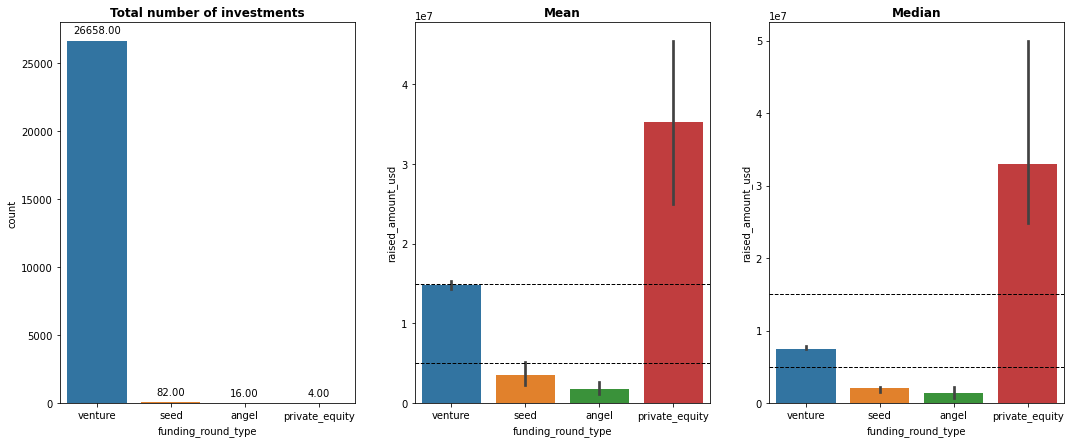

In [49]:
plt.figure(figsize=(18, 7))

# Plot 1: Total number of Investments 
plt.subplot(1, 3, 1)
axcs = sns.countplot(x="funding_round_type", data=master_frame_alltype,)
for p in axcs.patches:
    axcs.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Total number of investments", weight ='bold')

# Plot 2: Mean
plt.subplot(1, 3, 2)
sns.barplot(y='raised_amount_usd', x="funding_round_type", data=master_frame_alltype, estimator=np.mean)
plt.title("Mean", weight ='bold')
plt.axhline(y=5000000, linewidth=1, color = 'black', ls='--')
plt.axhline(y=15000000, linewidth=1, color = 'black', ls='--')

# Plot 3: Median
plt.subplot(1, 3, 3)
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame_alltype, estimator=np.median)
plt.title("Median", weight ='bold')
plt.axhline(y=5000000, linewidth=1, color = 'black', ls='--')
plt.axhline(y=15000000, linewidth=1, color = 'black', ls='--')

plt.show()

We see that most investments are made in the **`Venture`** funding type with about **`26658`** investments.

In [50]:
#Finding mean values of selected funding types
round(funding_type_filter['raised_amount_usd'].mean().sort_values(ascending = False))

funding_round_type
private_equity    35225293.0
venture           14778214.0
seed               3490743.0
angel              1812189.0
Name: raised_amount_usd, dtype: float64

In [51]:
#Finding median values of selected funding types
round(funding_type_filter['raised_amount_usd'].median().sort_values(ascending = False))

funding_round_type
private_equity    33000000.0
venture            7500000.0
seed               2000000.0
angel              1353460.0
Name: raised_amount_usd, dtype: float64

##### Mean value of Venture funding type = 14 million (estimate)
##### Median value of Venture funding type = 7 million (estimate)

*We observe that **`Median`** is the most representative value of the investment amount and **`Venture`** funding investment type is the most suitable as it is around **`Seven million`** and it satisfies the constraints of investing between 5 to 15 million USD per round of investment and also the business requirement of investing where most number of investments are made*

### ‣ Country Type Analysis

Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. This is a part of its broader strategy to invest where most investments are occurring.  Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)



Hence For the chosen investment type, Lets make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

##### Lets filter the data so that it only contains the data for the investment type "venture"

In [52]:
master_frame =  master_frame[master_frame.funding_round_type=="venture"]
master_frame.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-05-01,10000000.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-09-11,20000000.0
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,2014-07-19,8900000.0
28,/organization/10-minutes-with,10 Minutes With,Education,operating,GBR,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,2014-09-10,4000000.0


In [53]:
master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(9)

country_code
USA    2.938900e+11
CHN    3.374326e+10
GBR    1.271288e+10
IND    1.033477e+10
CAN    6.158663e+09
ISR    5.168712e+09
FRA    4.763956e+09
DEU    4.675268e+09
SWE    2.350291e+09
Name: raised_amount_usd, dtype: float64

Lets now create a new data frame called `top9` with the list of `top 9 countries` with the highest raised amount

In [54]:
top9 = master_frame[master_frame['country_code'].isin(["USA","CHN","GBR","IND","CAN","ISR","FRA","DEU","SWE"])]

We see that `United states of America - USA`, `GBR - United Kingdom` and `India -IND` are the top 3 countries where English is an official language.

In [55]:
# filtering for the top three countries
top3 = master_frame[master_frame['country_code'].isin(['USA','GBR','IND'])]
top3.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-05-01,10000000.0
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-09-11,20000000.0
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,2014-07-19,8900000.0
28,/organization/10-minutes-with,10 Minutes With,Education,operating,GBR,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,2014-09-10,4000000.0
34,/organization/1000memories,1000memories,Curated Web,acquired,USA,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,A,2011-02-16,2520000.0


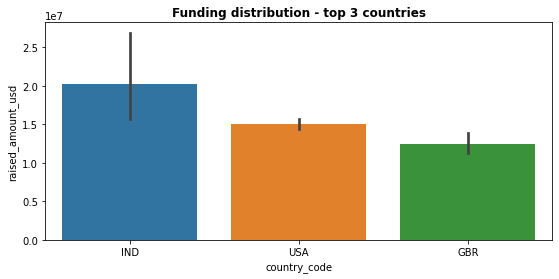

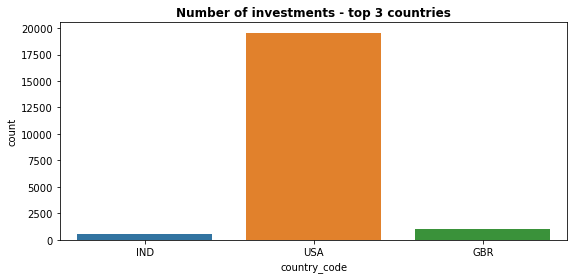

In [56]:
plt.figure(figsize=(20, 4))

# barplot to see distributions of funding amount across top 3 english speaking countries
plt.subplot(1, 2, 1)
sns.barplot(x='country_code', y='raised_amount_usd', data=top3)
plt.title('Funding distribution - top 3 countries', weight="bold")
plt.show()

plt.figure(figsize=(20, 4))
# countplot to see number of investments across top 3 english speaking countries
plt.subplot(1, 2, 2)
sns.countplot("country_code", data=top3)
plt.title('Number of investments - top 3 countries', weight="bold")
plt.show()

We observe that across the top 3 english speaking countries, `India -IND` raised more amount and `USA` made more investments.

### ‣ Sector Type Analysis

When we say sector analysis, we refer to one of the eight main sectors (named main_sector) listed in the mapping file (note that ‘Other’ is one of the eight main sectors). This is to simplify the analysis by grouping the numerous category lists (named ‘category_list’) in the mapping file. For example, in the mapping file, category_lists such as ‘3D’, ‘3D Printing’, ‘3D Technology’, etc. are mapped to the main sector ‘Manufacturing’.


Also, for some companies, the category list is a list of multiple sub-sectors separated by a pipe (vertical bar |). For example, one of the companies’ category_list is Application Platforms|Real Time|Social Network Media.

 
We discuss with the CEO and come up with the business rule that the first string before the vertical bar will be considered the primary sector. In the example above, ‘Application Platforms’ will be considered the primary sector.

##### Reading the mapping.csv file

In [57]:
mapping = pd.read_csv('mapping.csv')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [58]:
#Checking the datatypes
mapping.dtypes

category_list                              object
Automotive & Sports                         int64
Blanks                                      int64
Cleantech / Semiconductors                  int64
Entertainment                               int64
Health                                      int64
Manufacturing                               int64
News, Search and Messaging                  int64
Others                                      int64
Social, Finance, Analytics, Advertising     int64
dtype: object

In [59]:
#checking the information
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


We see that there are 7 main categories excluding `Others` and `Blank data`

##### Splitting items in category list which is list of multiple sub-sectors separated by a pipe ("|")

In [60]:
master_frame["category_list"] = master_frame["category_list"].str.split("|").str.get(0)
master_frame.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-05-01,10000000.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-09-11,20000000.0
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,2014-07-19,8900000.0
28,/organization/10-minutes-with,10 Minutes With,Education,operating,GBR,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,2014-09-10,4000000.0


In [61]:
# Checking the unique values in the column "category_list"
mapping.category_list.sort_values(ascending=True).unique()

array(['0notechnology', '0tural Language Processing', '0tural Resources',
       '0vigation', '3D', '3D Printing', '3D Technology', 'A0lytics',
       'Accounting', 'Active Lifestyle', 'Ad Targeting',
       'Advanced Materials', 'Adventure Travel', 'Advertising',
       'Advertising Exchanges', 'Advertising Networks',
       'Advertising Platforms', 'Advice', 'Aerospace', 'Agriculture',
       'Air Pollution Control', 'Algorithms', 'All Markets',
       'All Students', 'Alter0tive Medicine', 'Alumni', 'Android',
       'Angels', 'Animal Feed', 'Anything Capital Intensive',
       'App Discovery', 'App Marketing', 'App Stores',
       'Application Performance Monitoring', 'Application Platforms',
       'Apps', 'Aquaculture', 'Architecture', 'Archiving', 'Art',
       'Artificial Intelligence', 'Artists Globally',
       'Assisitive Technology', 'Assisted Living', 'Auctions', 'Audio',
       'Audiobooks', 'Augmented Reality', 'Auto', 'Automated Kiosk',
       'Automotive', 'B2B', 'B2B 

We see that some categories have been mis-spelled where letters "na" have been converted to "0", we can go ahead and correct them (Eg : 'Business A0lytics').

In [62]:
#Converting the datatype to "string"
mapping['category_list'] = mapping.category_list.astype(str)

# Correcting categories which have been mis-spelled where letters "na" have been converted to "0",
mapping['category_list'] = mapping.category_list.apply(lambda x: x.replace('0', 'na'))
mapping.category_list.sort_values(ascending=True).unique()

array(['3D', '3D Printing', '3D Technology', 'Accounting',
       'Active Lifestyle', 'Ad Targeting', 'Advanced Materials',
       'Adventure Travel', 'Advertising', 'Advertising Exchanges',
       'Advertising Networks', 'Advertising Platforms', 'Advice',
       'Aerospace', 'Agriculture', 'Air Pollution Control', 'Algorithms',
       'All Markets', 'All Students', 'Alternative Medicine', 'Alumni',
       'Analytics', 'Android', 'Angels', 'Animal Feed',
       'Anything Capital Intensive', 'App Discovery', 'App Marketing',
       'App Stores', 'Application Performance Monitoring',
       'Application Platforms', 'Apps', 'Aquaculture', 'Architecture',
       'Archiving', 'Art', 'Artificial Intelligence', 'Artists Globally',
       'Assisitive Technology', 'Assisted Living', 'Auctions', 'Audio',
       'Audiobooks', 'Augmented Reality', 'Auto', 'Automated Kiosk',
       'Automotive', 'B2B', 'B2B Express Delivery', 'BPO Services',
       'Babies', 'Baby Accessories', 'Baby Boomers', 'Bab

##### Creating a merged dataframe with each primary sector mapped to its main sector where primary sector is a separate column

In [63]:
#Converting "mapping" from wide format to long format and naming the resultant column as 'main_sector'
mapping = pd.melt(mapping, id_vars=["category_list"], var_name='main_sector')

#filtering relevant rows where value is not equal to 0
mapping = mapping[mapping.value != 0]

#Dropping the additional "value" column
mapping = mapping.drop('value', axis=1)

mapping.head()

,category_list,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports


In [64]:
#Merging "master_frame" and "mapping" dataframes 
master_frame = pd.merge(master_frame, mapping, how='inner', on='category_list')

#Renaming category_list to primary_sector
master_frame.rename(columns={'category_list':'primary_sector'}, inplace=True)
master_frame.head()

,permalink,name,primary_sector,status,country_code,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-05-01,10000000.0,Entertainment
1,/organization/all-def-digital,All Def Digital,Media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,2014-06-08,5000000.0,Entertainment
2,/organization/audiosocket,Audiosocket,Media,operating,USA,/funding-round/4e3a53eec6c609943df752206070b23f,venture,A,2009-02-09,750000.0,Entertainment
3,/organization/babble,Babble,Media,acquired,USA,/funding-round/43cc678b39be3e684bb88501af05ff9b,venture,A,2009-05-02,2000000.0,Entertainment
4,/organization/babble,Babble,Media,acquired,USA,/funding-round/5fdb3dbeeb6eea0243702adc372130f3,venture,A,2009-12-05,1250000.0,Entertainment


In [65]:
#Rearranging the columns in the "master_frame" for ease of understanding
master_frame = master_frame[['permalink',
                             'name',
                             'status',
                             'country_code',
                             'primary_sector',
                             'main_sector',
                             'funding_round_type',
                             'raised_amount_usd',
                             'funding_round_permalink',
                             'funding_round_code',
                             'funded_at',]]
master_frame.head(3)

,permalink,name,status,country_code,primary_sector,main_sector,funding_round_type,raised_amount_usd,funding_round_permalink,funding_round_code,funded_at
0,/organization/-fame,#fame,operating,IND,Media,Entertainment,venture,10000000.0,/funding-round/9a01d05418af9f794eebff7ace91f638,B,2015-05-01
1,/organization/all-def-digital,All Def Digital,operating,USA,Media,Entertainment,venture,5000000.0,/funding-round/452a2342fe720285c3b92e9bd927d9ba,A,2014-06-08
2,/organization/audiosocket,Audiosocket,operating,USA,Media,Entertainment,venture,750000.0,/funding-round/4e3a53eec6c609943df752206070b23f,A,2009-02-09


##### Now, the aim is to find out the most heavily invested main sectors in each of the three countries (for funding type - venture and investments range of 5-15 Million USD).

Lets create three separate data frames `D1`, `D2` and `D3` for each of the three countries containing the observations of funding type `venture` falling within the `5-15 million USD` range. The three data frames should contain:

- All the columns of the 'master_frame' along with the 'primary sector' and the 'main sector'

- The `total number (or count) of investments` for each main sector in a separate column

- The `total amount invested` in each main sector in a separate column

In [66]:
#Setting the filters for investment range between 5 and 15 million USD, top three countries and funding type
master_frame = master_frame[(master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000)]
master_frame = master_frame[master_frame['country_code'].isin(['USA','GBR','IND'])]
master_frame = master_frame[master_frame['funding_round_type'].isin(['venture'])]

In [67]:
# First english speaking country 'USA' for funding type venture
D1 = master_frame[master_frame.country_code == 'USA']
# Second english speaking country 'Great Britain' for funding type venture
D2 = master_frame[master_frame.country_code == 'GBR']
# Third english speaking country 'India' for funding type venture
D3 = master_frame[master_frame.country_code == 'IND']

### U.S.A (United States of America) 

In [68]:
#Finding the total number of investments made - USA
print("Total number of investments made - USA :")
print(D1.raised_amount_usd.count())

print("\n")

#Finding total investment amount - USA
print("Total investment amount - USA :")
print(D1.raised_amount_usd.sum())

Total number of investments made - USA :
8585


Total investment amount - USA :
77920593466.0


In [69]:
#finding the 3 Top sectors (based on count of investments) - USA
D1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending = False).head(3)

main_sector
Others                                     2167
Social, Finance, Analytics, Advertising    2157
Cleantech / Semiconductors                 1378
Name: raised_amount_usd, dtype: int64

In [70]:
#finding the highest invested company among the 1st Top sector of the country - USA
D1[D1['main_sector']=='Others'].groupby(['main_sector','name']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  name                  
Others       Virtustream               54750000.0
             Black Duck Software       51000000.0
             AirTight Networks         46750000.0
             Redfin                    44800000.0
             Elemental Technologies    44100000.0
Name: raised_amount_usd, dtype: float64

In [71]:
#finding the highest invested company among the 2nd Top sector of the country - USA
D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','name']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                              name             
Social, Finance, Analytics, Advertising  Demandbase           63000000.0
                                         NetBase Solutions    60600000.0
                                         Lotame               59700000.0
                                         Xactly Corp          54500000.0
                                         INRIX                51100018.0
Name: raised_amount_usd, dtype: float64

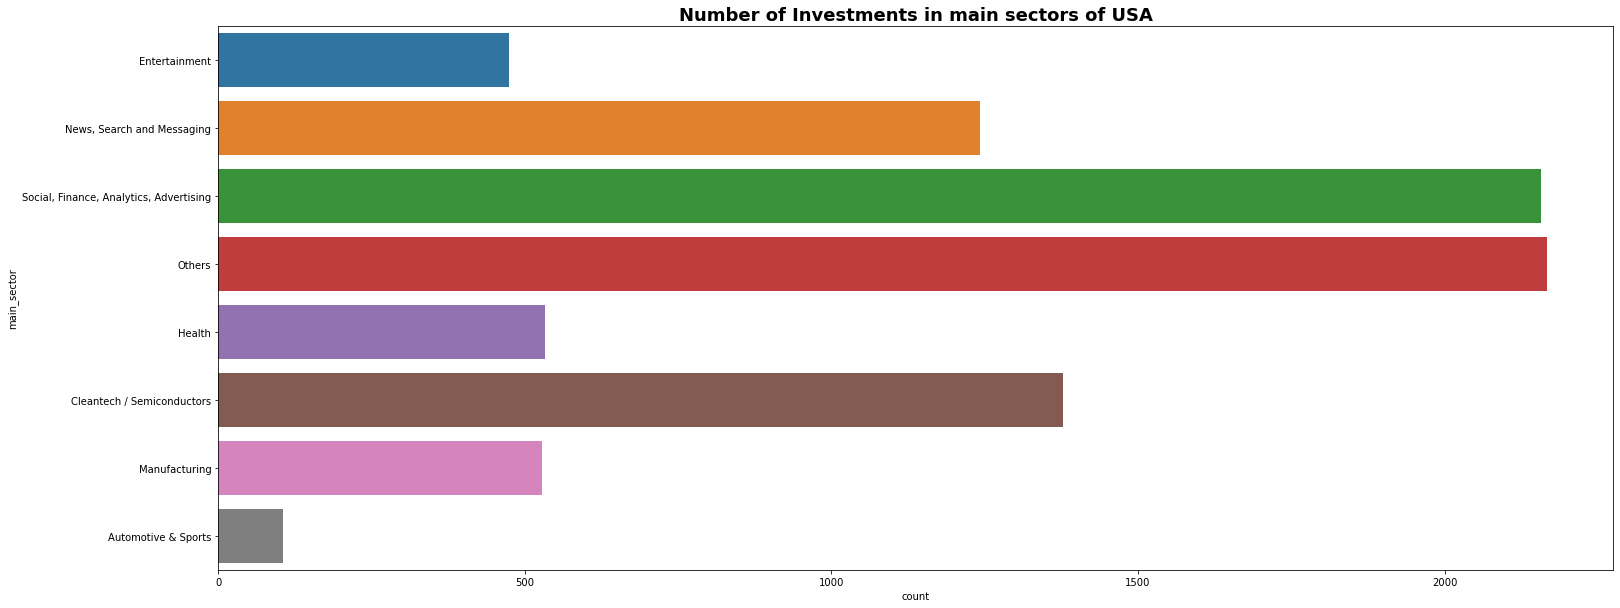

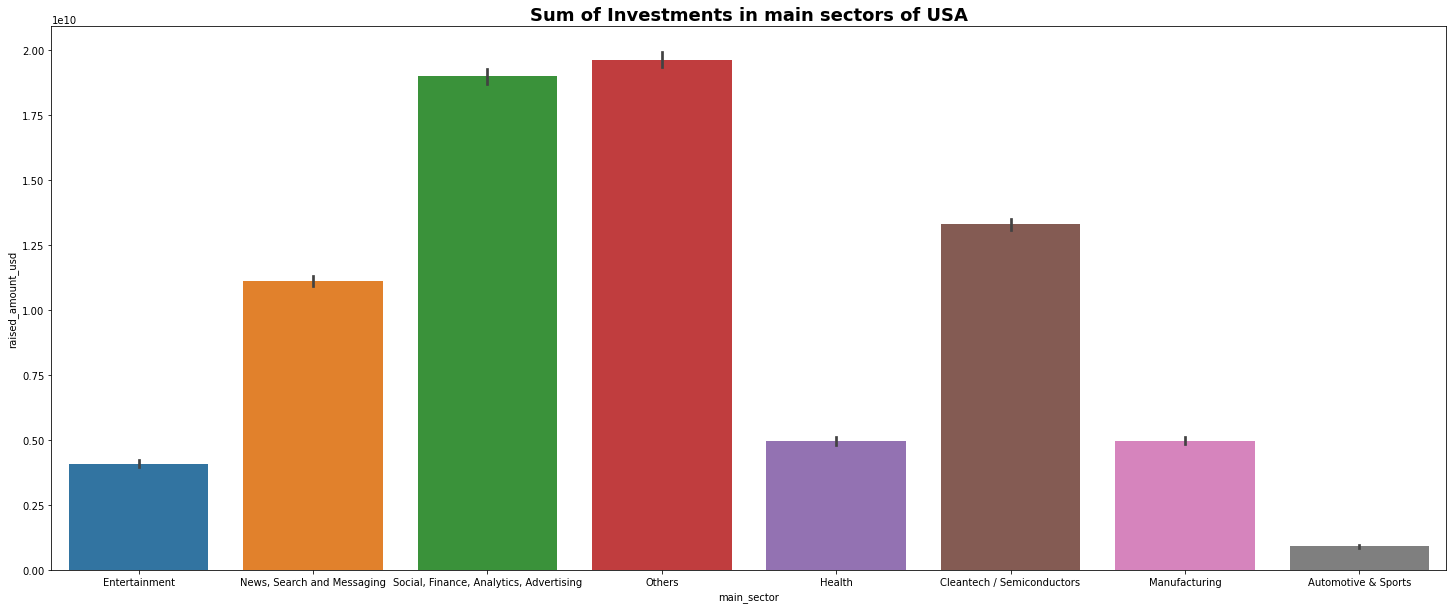

In [72]:
#Plots identifying the total number & Sum of investments in 3 main sectors of USA

plt.figure(figsize=(55, 10))
plt.subplot(1, 2, 1)
sns.countplot(y="main_sector", data=D1)
plt.title("Number of Investments in main sectors of USA", weight = 'bold', fontsize =18)

plt.figure(figsize=(55, 10))
plt.subplot(1, 2, 2)
sns.barplot(y="raised_amount_usd", x="main_sector", data=D1, estimator=sum)
plt.title("Sum of Investments in main sectors of USA", weight = 'bold', fontsize =18)
plt.show()

### GBR - (Great Britain / United Kingdom)

In [73]:
#Finding the total number of investments made - GBR
print("Total number of investments made - GBR :")
print(D2.raised_amount_usd.count())

print("\n")

#Finding total investment amount - GBR
print("Total investment amount - GBR :")
print(D2.raised_amount_usd.sum())

Total number of investments made - GBR :
383


Total investment amount - GBR :
3438842990.0


In [74]:
#finding the 3 Top sectors (based on count of investments) - GBR
round(D2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending = False).head(3))

main_sector
Social, Finance, Analytics, Advertising    98
Cleantech / Semiconductors                 82
Others                                     81
Name: raised_amount_usd, dtype: int64

In [75]:
#finding the highest invested company among the 1st Top sector of the country - GBR
D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','name']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                              name                 
Social, Finance, Analytics, Advertising  Celltick Technologies    37500000.0
                                         myThings                 34000000.0
                                         Zopa                     32900000.0
                                         SumUp                    24293649.0
                                         Amplience                24200000.0
Name: raised_amount_usd, dtype: float64

In [76]:
#finding the highest invested company among the 2nd Top sector of the country - GBR
D2[D2['main_sector']=='Cleantech / Semiconductors'].groupby(['main_sector','name']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                 name                        
Cleantech / Semiconductors  Horizon Discovery               31353719.0
                            F-star Biotechnology Limited    29132906.0
                            Elixent                         25000000.0
                            Immune Targeting Systems        20320961.0
                            Plaxica                         19940192.0
Name: raised_amount_usd, dtype: float64

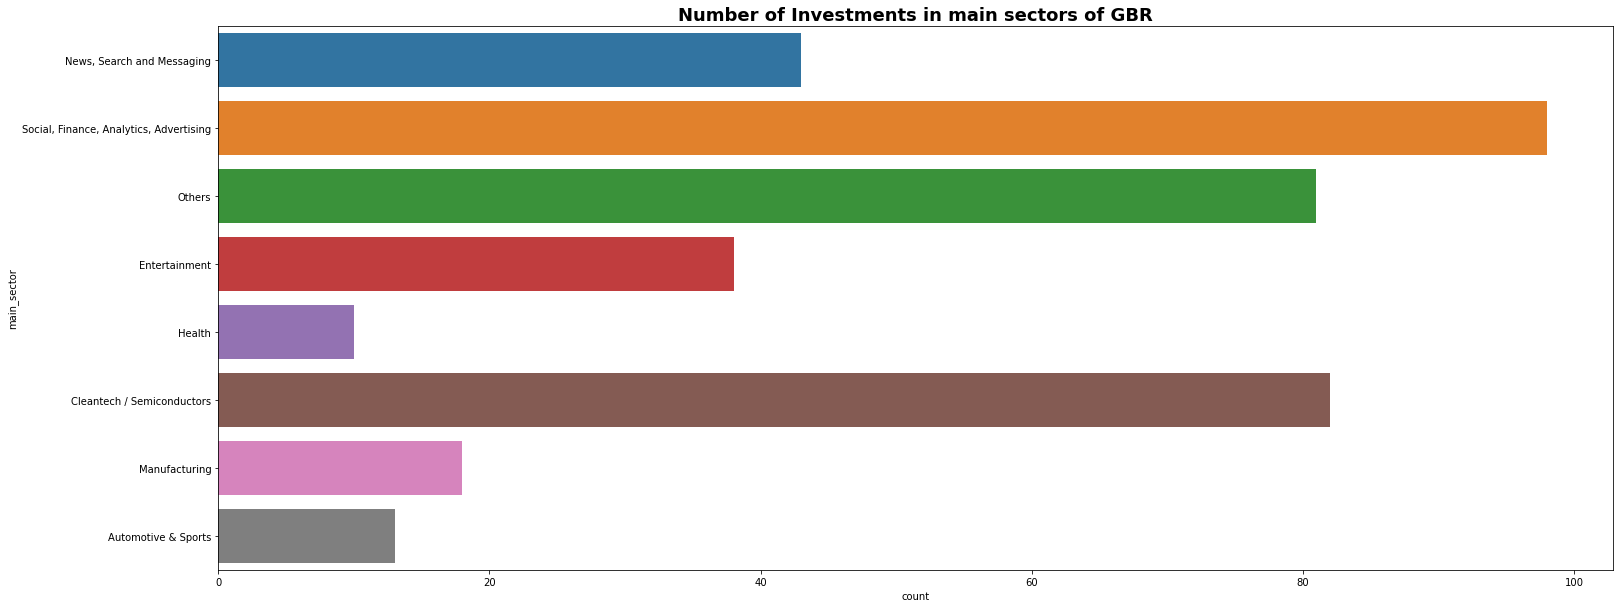

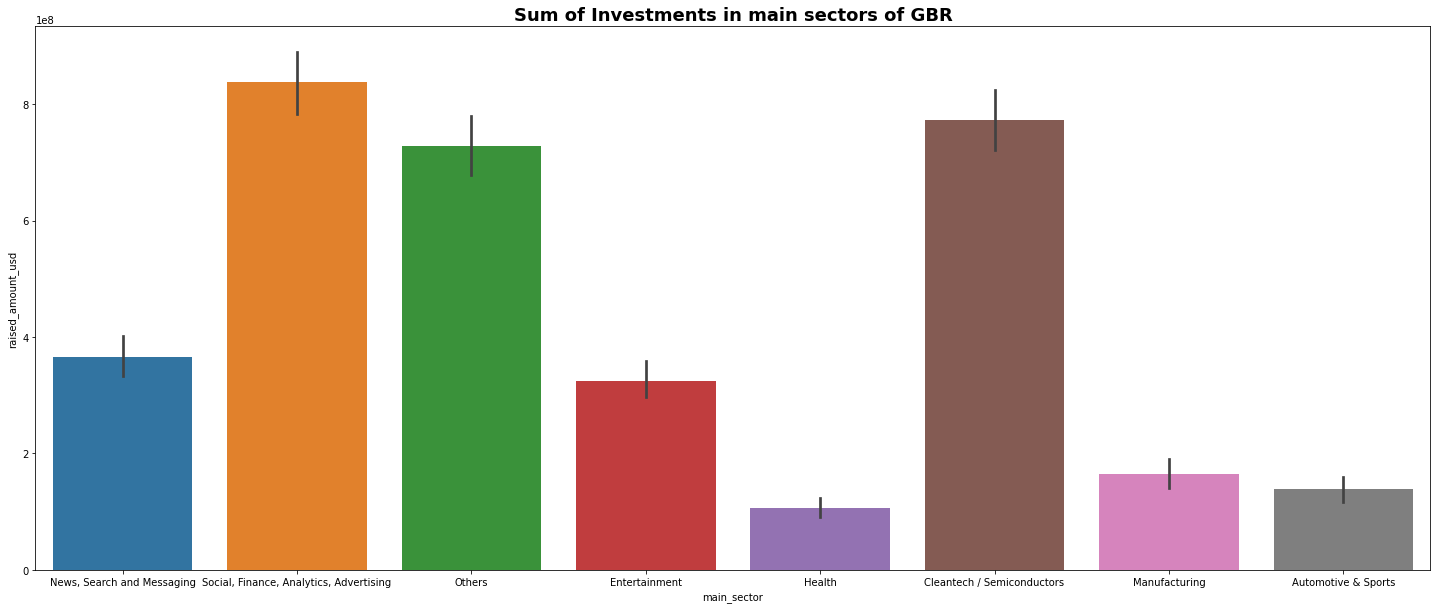

In [77]:
#Plots identifying the total number & Sum of investments in 3 main sectors of GBR
plt.figure(figsize=(55, 10))
plt.subplot(1, 2, 1)
sns.countplot(y="main_sector", data=D2)
plt.title("Number of Investments in main sectors of GBR", weight = 'bold', fontsize =18)

plt.figure(figsize=(55, 10))
plt.subplot(1, 2, 2)
sns.barplot(y="raised_amount_usd", x="main_sector", data=D2, estimator=sum)
plt.title("Sum of Investments in main sectors of GBR", weight = 'bold', fontsize =18)
plt.show()

### IND (India)

In [78]:
#Finding the total number of investments made - IND
print("Total number of investments made - IND :")
print(D3.raised_amount_usd.count())

print("\n")

#Finding total investment amount - IND
print("Total investment amount - IND :")
print(D3.raised_amount_usd.sum())

Total number of investments made - IND :
228


Total investment amount - IND :
2037157552.0


In [79]:
#finding the 3 Top sectors (based on count of investments) - IND
D3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending = False).head(3)

main_sector
Others                                     81
Social, Finance, Analytics, Advertising    41
News, Search and Messaging                 41
Name: raised_amount_usd, dtype: int64

In [80]:
#finding the highest invested company among the 1st Top sector of the country - IND
D3[D3['main_sector']=='Others'].groupby(['main_sector','name']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  name                               
Others       FirstCry.com                           39000000.0
             Myntra                                 38000000.0
             CommonFloor                            32900000.0
             Pepperfry.com                          28000000.0
             NxtGen Data Center & Cloud Services    22300000.0
Name: raised_amount_usd, dtype: float64

In [81]:
#finding the highest invested company among the 2nd Top sector of the country - IND
D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','name']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                              name           
Social, Finance, Analytics, Advertising  Manthan Systems    50700000.0
                                         Komli Media        28000000.0
                                         ShopClues.com      25000000.0
                                         BankBazaar.com     19000000.0
                                         Qyuki              15400000.0
Name: raised_amount_usd, dtype: float64

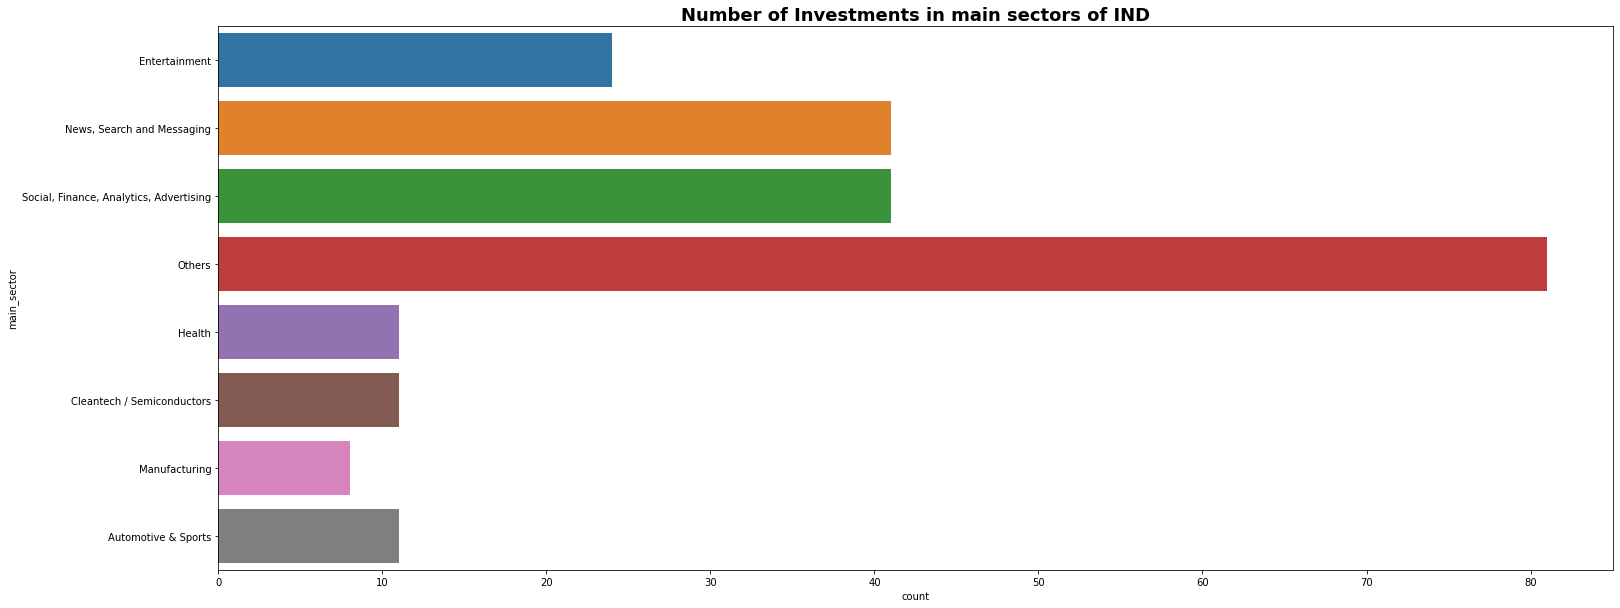

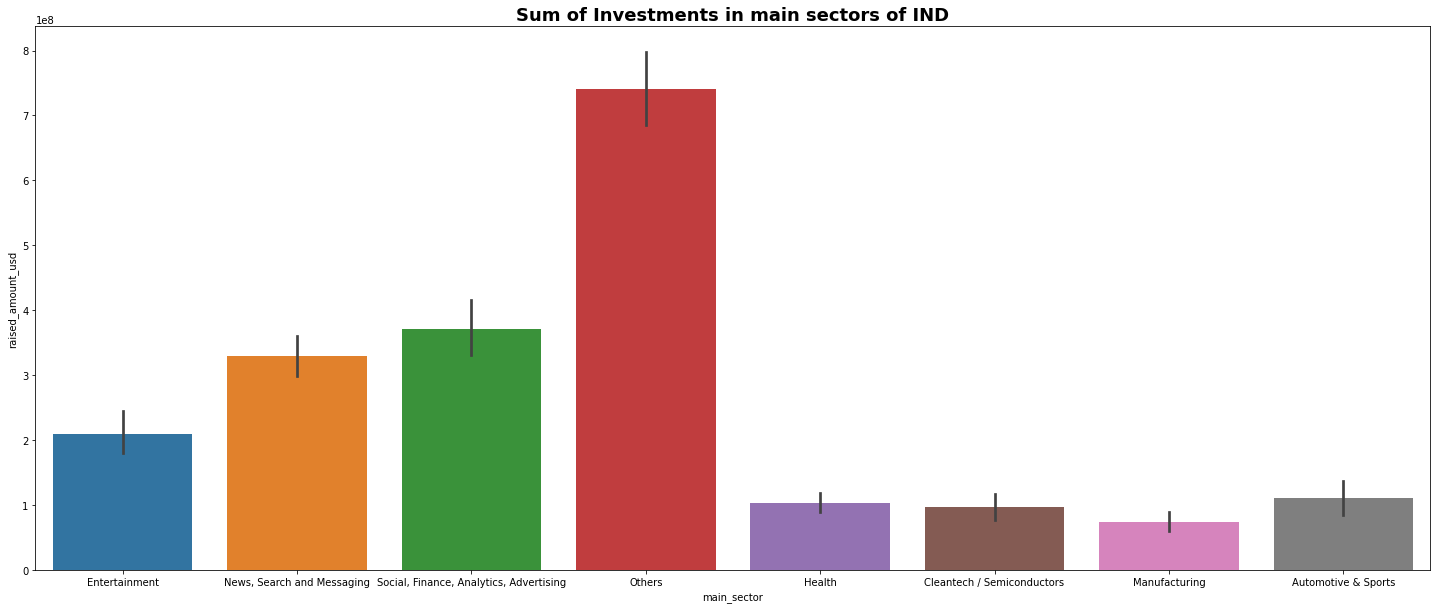

In [82]:
#Plots identifying the total number & Sum of investments in 3 main sectors of IND
plt.figure(figsize=(55, 10))
plt.subplot(1, 2, 1)
sns.countplot(y="main_sector", data=D3)
plt.title("Number of Investments in main sectors of IND", weight = 'bold', fontsize =18)

plt.figure(figsize=(55, 10))
plt.subplot(1, 2, 2)
sns.barplot(y="raised_amount_usd", x="main_sector", data=D3, estimator=sum)
plt.title("Sum of Investments in main sectors of IND", weight = 'bold', fontsize =18)
plt.show()

### ‣ Plots

As a final step, we have to present our findings to the CEO of Spark Funds. Specifically, she wants to see the following plots:

##### A bar plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that venture funding type is best suited for Spark Funds.

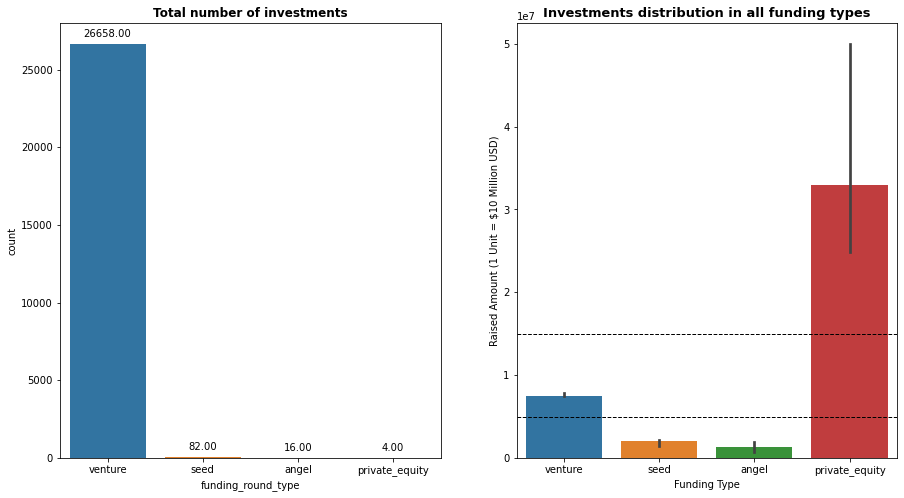

In [83]:
plt.figure(figsize=(15,8))

# Plot 1: Total number of Investments 
plt.subplot(1, 2, 1)
axc =sns.countplot(x="funding_round_type", data=master_frame_alltype)
for p in axc.patches:
    axc.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Total number of investments", weight ='bold')

#Plot 2: Amount of investment in each funding type with indicator (5 -15 Million USD)
plt.subplot(1, 2, 2)
ax=sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame_alltype, estimator=np.median)
plt.title("Investments distribution in all funding types", weight ='bold',fontsize =13)
ax.set(xlabel='Funding Type', ylabel='Raised Amount (1 Unit = $10 Million USD)')
plt.axhline(y=5000000, linewidth=1, color = 'black', ls='--')
plt.axhline(y=15000000, linewidth=1, color = 'black', ls='--')
plt.show()

##### A Barplot showing the top 9 countries against the total amount of investments of funding type "venture". This should make the top 3 countries (USA, United Kingdom, and India) very clear.

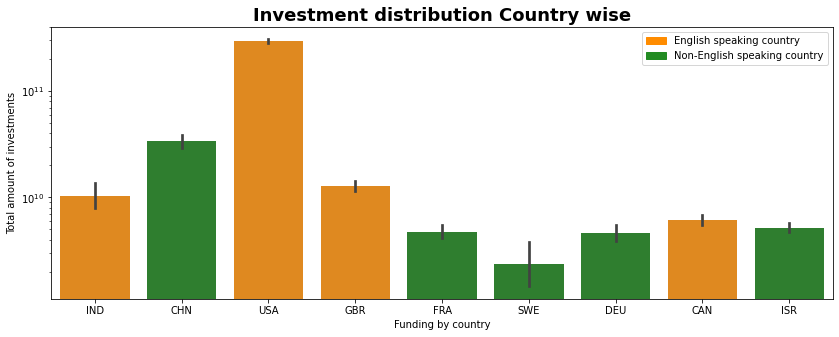

In [84]:
plt.figure(figsize=(14,5))
color_eng = "#FF8C00"
color_non_eng = "#228B22"
palette = [color_eng, color_non_eng, color_eng, color_eng, color_non_eng, color_non_eng, color_non_eng, color_eng, color_non_eng]
ax2 = sns.barplot(x='country_code', y='raised_amount_usd', data=top9, estimator=np.sum, palette=palette)
p_eng = mpatches.Patch(color=color_eng, label='English speaking country')
p_non_eng = mpatches.Patch(color=color_non_eng, label='Non-English speaking country')
ax2.legend(handles=[p_eng, p_non_eng])
ax2.set_yscale('log')
ax2.set(xlabel='Funding by country', ylabel='Total amount of investments')
ax2.set_title('Investment distribution Country wise',fontsize =18, weight='bold')
plt.show()

**Note**: *The top three countries are USA, Great Britain (BGR) and India(IND), China(CHN) was not considered as English is not its official language*

##### A Barplot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type - "venture"). 

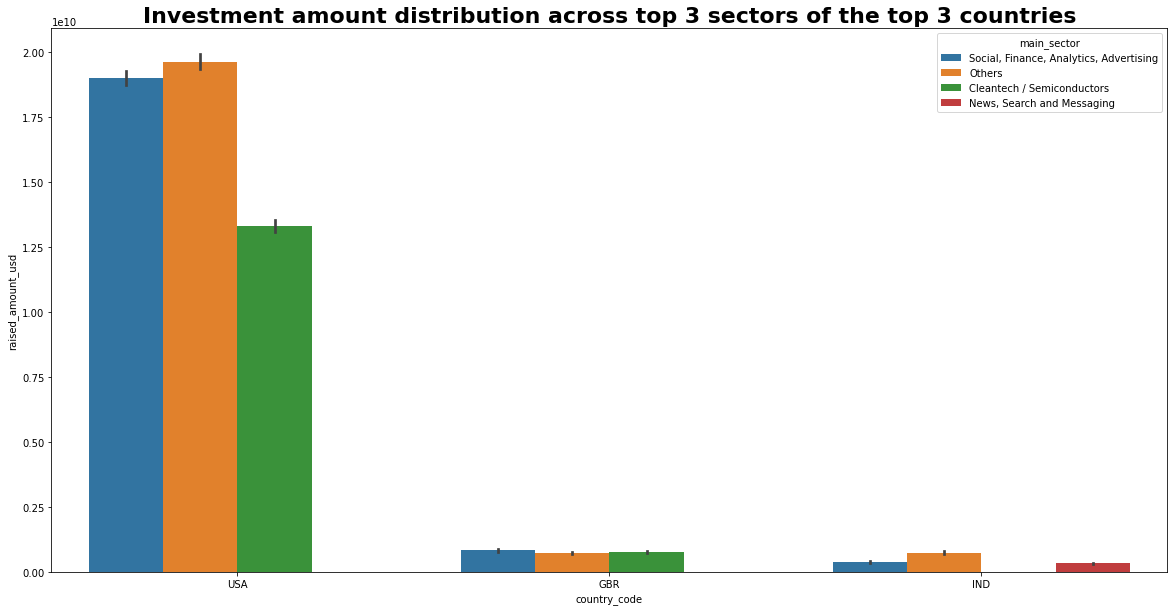

In [85]:
D1 = D1[D1['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising", "Cleantech / Semiconductors"])]
D2 = D2[D2['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising","Cleantech / Semiconductors"])]
D3 = D3[D3['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising","News, Search and Messaging"])]

countries = [D1, D2, D3]
topthree = pd.concat(countries) 
plt.figure(figsize=(20, 10))
plt.title("Investment amount distribution across top 3 sectors of the top 3 countries",fontsize =22, weight="bold")
sns.barplot(y='raised_amount_usd', x='country_code', hue="main_sector", data=topthree, estimator=np.sum)
plt.show()

#### From the above plots we can infer the following:
####          ‣Best funding type to invest : Venture
####          ‣Best Country to invest : USA
####          ‣Best Sector to invest : Others